In [187]:

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm # colormap ! 
from matplotlib.patches import Circle
import matplotlib.patches as patches

from scipy.signal import resample
from scipy.io.wavfile import write

from subprocess import Popen
import subprocess as sp
import os

from importlib import reload
import note_class as nc

import sys
sys.path.append('../2_modules/')
import pitches as pitch_fcns
#import IPython.display as ipd

In [188]:
# ===========================================================
base_name = 'keyring_OOP_test'
frames_dir = './frames/'
anim_out_name = frames_dir + base_name + '.mp4' 
sound_name = base_name + '.wav'
movie_w_sound_name = base_name + '_wSnd.avi'

In [189]:
pitch_classes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
radian = np.linspace(0,2*np.pi,len(pitch_classes)+1)

pc_indexes = np.asarray([0,2,4,5,7,9,11,12])
delta_octs = (np.floor(pc_indexes/ 12)).astype(int)
root_oct = 3
octs = root_oct + delta_octs
print(octs)


[3 3 3 3 3 3 3 4]


In [190]:
print(type(pc_indexes[:]))
# T = [L[i] for i in Idx]
key_pcs = []
radian_vals = []
for i in range(len(pc_indexes)):
    ind = pc_indexes[i]%12
    key_pcs.append(pitch_classes[ind])
    radian_vals.append(radian[ind])
    
print(key_pcs)
print(radian_vals)

NameFreq_dict = pitch_fcns.pitch_dict()
#print(NameFreq_dict)


dur_song = 20
delay = 1.0
dur_total = dur_song+delay

durs = np.ones(len(key_pcs))*2
start_times = np.linspace(0,dur_song-durs[-1],len(key_pcs))+delay
print(start_times)    

<class 'numpy.ndarray'>
['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']
[0.0, 1.0471975511965976, 2.0943951023931953, 2.617993877991494, 3.665191429188092, 4.71238898038469, 5.759586531581287, 0.0]
[ 1.          3.57142857  6.14285714  8.71428571 11.28571429 13.85714286
 16.42857143 19.        ]


In [191]:
# make the soundtrack

soundtrack = np.zeros(int(dur_total*sampfreq))
time = np.linspace(0,dur_song+delay, int(dur_total*sampfreq))
print(len(time))
print(time[-1])

926100
21.0


In [209]:
reload(nc)
print(nc)

notes = []

for ind in range(len(key_pcs)):
    pc = key_pcs[ind]
    oct_n=octs[ind]
    sym_name = pc+str(oct_n)
    print(sym_name)
    freq = NameFreq_dict[sym_name]
    print(freq)
    t_start = start_times[ind]
    ampfac=0.8
    framerate=30.0
    sampfreq=44100
    dur=durs[ind] #2.0
    nn = nc.Note(pc, oct_n, freq, t_start, dur, ampfac, framerate, sampfreq,radian)
    notes.append(nn)

#blobj = blob.Blob(df_tmp,movie_dict)

<module 'note_class' from '/home/ben/githole/datamovies/1_codes/note_class.py'>
C3
130.81
D3
146.83
E3
164.81
F3
174.61
G3
196.0
A3
220.0
B3
246.94
C4
261.63


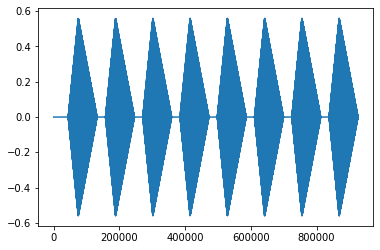

In [210]:
for nn in notes:
    #print(nn.t_start)
    ind_start = np.where(time>nn.t_start)[0][0]
    #print(ind_start)
    #print(time[ind_start])
    beepwave = nn.beep
    ind_end = ind_start + len(beepwave)
    soundtrack[ind_start:ind_end] = nn.beep[:]
    
plt.plot(soundtrack)

In [211]:
# save the file ! 

write(sound_name, sampfreq, soundtrack)

## Now for the dots ! 

In [215]:
# =============================================
def makeKeyRing_base(indexes):

    circle = np.linspace(0,2*np.pi,64)
    r = 1.0
    x = r*np.sin(circle)
    y = r*np.cos(circle)

    # the note locations. 
    base_dots = np.linspace(0,2*np.pi,13)
    xd = r*np.sin(base_dots)
    yd = r*np.cos(base_dots)

    # the text locations
    r = 1.15
    xt = r*np.sin(base_dots)
    yt = r*np.cos(base_dots)

    # =================
    fig1 = plt.figure(figsize=(6, 6))
    ax1 = fig1.add_subplot(111, aspect='equal')

    # (0) plot a filled square with a filled circle in it...
    # patches.Rectangle((x,y,lower left corner),width,height)
    #ax1.add_patch(patches.Rectangle((0.1, 0.1),0.5,0.5,facecolor="red"))

    ax1.add_patch(patches.Rectangle((-1.25, -1.25),2.5,2.5,facecolor=[0.6, 0.6, 0.6]))
    ax1.plot(x,y,'k-')
    ax1.plot(xd,yd,'w.')

    radius_norm = 0.08  # radius normalized, scaled to size of box

    for ind,interval in enumerate(indexes):
        # print(ind,interval)
        ax1.add_patch(patches.Circle((xd[interval], yd[interval]),radius_norm,facecolor="red")) 
        ax1.text(xt[interval], yt[interval],pitch_classes[interval])

    # add current note !  
    # posind = indexes[indnow]
    # print(posind)
    # ax1.add_patch(patches.Circle((xd[posind], yd[posind]),radius_norm*2,facecolor="yellow",alpha=0.3))

    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    return fig1, ax1

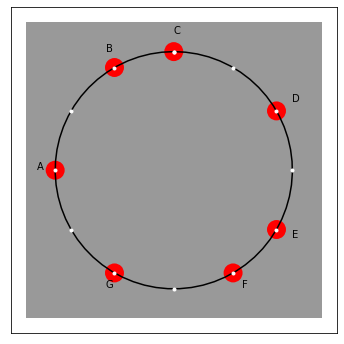

In [217]:
indexes_ring = np.asarray([0,2,4,5,7,9,11])
fig1, ax1 = makeKeyRing_base(indexes_ring) ;
plt.show()

In [220]:
# make total movie time! 
time_movie = np.linspace(0,dur_total,int(dur_total*framerate))


for key in nn.__dict__:
    print(key) 
    


pc
oct_n
sym_name
freq
t_start
dur
ampfac
framerate
sampfreq
n_frames
time_frames
amp_env_mov
amp_env_sound
beep
current_index
radian
x
y
facecolor
alpha
dot_radius_current


In [ ]:
dot = nn.updateDot()

active_blobs = []



# ax1.add_patch(dot)
# fig.savefig('wheresmyDOT.png')
# dot.remove()

# from the blobs one ! 
for time in time_movie:
    print(time)
    dot_list=[]
    remove_list=[]

    for nn in notes:
        if (str(nn.start_time()) == str(time)):
            #print('start time = ' + str(obj.start_time()) ) 
            active_blobs.append(obj)
    for obj in active_blobs:
        print('end time = ' + str(obj.end_time()) + ', time =' + str(time) ) 
        #if(str(obj.end_time()) == str(time)):  
        if( obj.current_index == len(obj.x_stg)-1 ):
            remove_list.append(obj)
            print('JUST ADDED BLOB TO REMOVE LIST')
    if len(remove_list)>0:
        for byebye in remove_list:
            print('JUST REMOVED BLOB FROM ACTIVE BLOB LIST')
            print(byebye)
            active_blobs.remove(byebye)
    print(active_blobs)
    print(remove_list)

    print('number of active blobs: '+str(len(active_blobs)))       
    if len(active_blobs)>0:      
        for obj in active_blobs:
            #dot = obj.update_location(ax, movie_dict)
            dot = obj.update_location(movie_dict)
            #print(type(dot))
            dot_list.append(dot)
            # x, y, rad, col, alf = obj.update_location(ax, movie_dict)
            # x_lst.append(x)
            # y_lst.append(y)
            # rad_lst.append(rad)
            # col_lst.append(col)
            # alf_lst.append(alf)

    print('dots in dot_list: '+str(len(dot_list))) 
    if len(dot_list)>0:
        for dot in dot_list:
            print('adding dots to plot')
            ax.add_patch(dot)  # or make a collection -- eventually.. more complicated. 
        #pts = ax.scatter(x_lst, y_lst, col_lst, edgecolor='black', s=rad_lst, alpha=alf_lst)
        # scatter cant change have an array of dot sizes ! 

    writer.grab_frame()

    if len(ax.patches)>0:
        #ax.patches = []
        for dot in ax.patches:
            #ax.remove()
            dot.remove()
        print(ax.patches)

    #ax.collections.remove(pts)
    #if dotsNow:
    #    dotsNow.remove()
    # bh: see question above... 
    reset_axes(ax)
